In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
data_dusseldorf = pd.read_csv('/content/drive/MyDrive/Project/weather-forecasting-prolog/Sample Data/dusseldorf_data.csv')

In [44]:
data_dusseldorf.head()

,DATE,MONTH,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_wind_gust,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max
0,20000101,1,8,2.5,5.9,0.92,1.0240,0.12,0.22,0.0,4.2,2.5,6.9
1,20000102,1,6,3.0,7.4,0.87,1.0283,0.19,0.00,0.7,6.5,2.7,7.9
2,20000103,1,7,5.5,14.3,0.78,1.0235,0.12,0.28,0.0,7.7,6.9,9.1
3,20000104,1,7,6.0,16.8,0.87,1.0162,0.12,0.97,0.0,7.8,6.6,9.2
4,20000105,1,4,4.5,11.2,0.80,1.0203,0.51,0.00,6.5,5.2,0.4,8.6


In [45]:
data_dusseldorf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DATE                         3654 non-null   int64  
 1   MONTH                        3654 non-null   int64  
 2   DUSSELDORF_cloud_cover       3654 non-null   int64  
 3   DUSSELDORF_wind_speed        3654 non-null   float64
 4   DUSSELDORF_wind_gust         3654 non-null   float64
 5   DUSSELDORF_humidity          3654 non-null   float64
 6   DUSSELDORF_pressure          3654 non-null   float64
 7   DUSSELDORF_global_radiation  3654 non-null   float64
 8   DUSSELDORF_precipitation     3654 non-null   float64
 9   DUSSELDORF_sunshine          3654 non-null   float64
 10  DUSSELDORF_temp_mean         3654 non-null   float64
 11  DUSSELDORF_temp_min          3654 non-null   float64
 12  DUSSELDORF_temp_max          3654 non-null   float64
dtypes: float64(10), in

In [46]:
data_dusseldorf.isnull().sum()

,0
DATE,0
MONTH,0
DUSSELDORF_cloud_cover,0
DUSSELDORF_wind_speed,0
DUSSELDORF_wind_gust,0
DUSSELDORF_humidity,0
DUSSELDORF_pressure,0
DUSSELDORF_global_radiation,0
DUSSELDORF_precipitation,0
DUSSELDORF_sunshine,0


In [59]:

data_dusseldorf['DATE'] = data_dusseldorf['DATE'].astype(str)

# Extract year, month, and day
data_dusseldorf['year'] = data_dusseldorf['DATE'].str[:4].astype(int)
data_dusseldorf['month'] = data_dusseldorf['DATE'].str[4:6].astype(int)
data_dusseldorf['day'] = data_dusseldorf['DATE'].str[6:].astype(int)



In [60]:
data_dusseldorf.head()

,DATE,MONTH,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_wind_gust,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,year,month,day
0,20000101,1,8,2.5,5.9,0.92,1.0240,0.12,0.22,0.0,4.2,2.5,6.9,2000,1,1
1,20000102,1,6,3.0,7.4,0.87,1.0283,0.19,0.00,0.7,6.5,2.7,7.9,2000,1,2
2,20000103,1,7,5.5,14.3,0.78,1.0235,0.12,0.28,0.0,7.7,6.9,9.1,2000,1,3
3,20000104,1,7,6.0,16.8,0.87,1.0162,0.12,0.97,0.0,7.8,6.6,9.2,2000,1,4
4,20000105,1,4,4.5,11.2,0.80,1.0203,0.51,0.00,6.5,5.2,0.4,8.6,2000,1,5


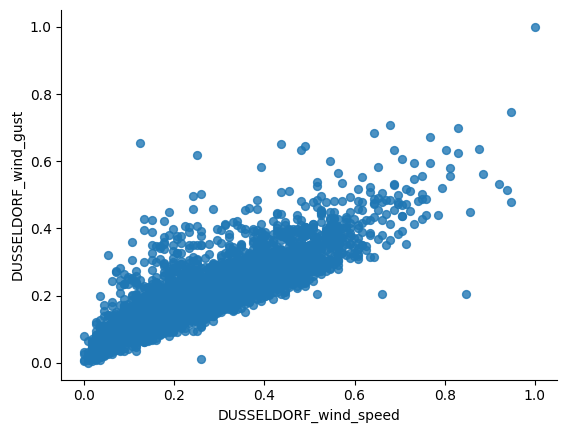

In [55]:
# @title DUSSELDORF_wind_speed vs DUSSELDORF_wind_gust

from matplotlib import pyplot as plt
data_dusseldorf.plot(kind='scatter', x='DUSSELDORF_wind_speed', y='DUSSELDORF_wind_gust', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

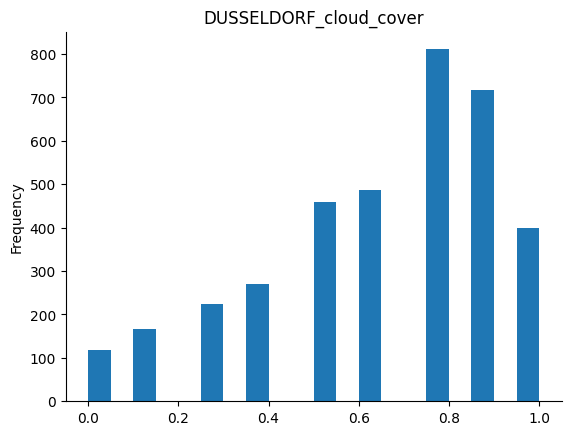

In [54]:
# @title DUSSELDORF_cloud_cover

from matplotlib import pyplot as plt
data_dusseldorf['DUSSELDORF_cloud_cover'].plot(kind='hist', bins=20, title='DUSSELDORF_cloud_cover')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [61]:
data_dusseldorf.drop(['DATE','MONTH'], axis=1, inplace=True)

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
for col in data_dusseldorf.columns:
    standard_scaler = StandardScaler()
    data_dusseldorf[col] = standard_scaler.fit_transform(data_dusseldorf[[col]])

In [64]:
data_dusseldorf.head()

,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_wind_gust,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,year,month,day
0,1.351189,-0.852066,-1.208024,1.472087,0.860114,-1.166699,0.004452,-1.027376,-1.037909,-0.709898,-1.081528,-1.566301,-1.600412,-1.672995
1,0.405719,-0.561008,-0.821801,1.023978,1.322428,-1.087205,-0.496096,-0.861061,-0.694033,-0.677377,-0.952959,-1.566301,-1.600412,-1.559398
2,0.878454,0.894282,0.954826,0.217383,0.806356,-1.166699,0.140965,-1.027376,-0.514619,0.005572,-0.798675,-1.566301,-1.600412,-1.445801
3,0.878454,1.185340,1.598532,1.023978,0.021497,-1.166699,1.710866,-1.027376,-0.499668,-0.043210,-0.785818,-1.566301,-1.600412,-1.332203
4,-0.539751,0.312166,0.156631,0.396626,0.462308,-0.723805,-0.496096,0.516975,-0.888397,-1.051372,-0.862960,-1.566301,-1.600412,-1.218606


In [65]:

data_dusseldorf.to_csv('new_scaled_data_dusseldorf.csv', index=False)

# Download the CSV file to your local machine (Google Colab)
from google.colab import files
files.download('new_scaled_data_dusseldorf.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>